In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import simulation
import dynamics
from models.holstein_lattice import HolsteinLatticeModel

100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

1000.0


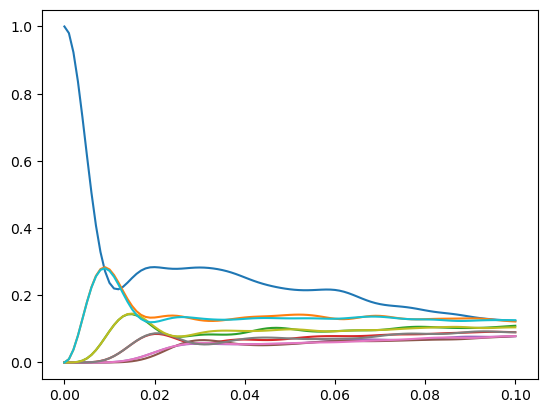

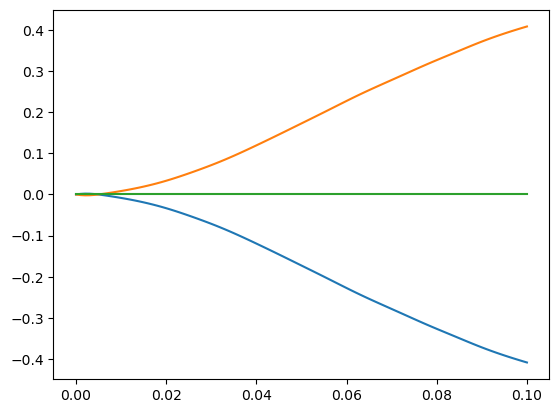

In [2]:
input_params = dict(num_states = 10, temp = 1, j = 1, w = 0.2, g = 1, m = 1)
sim = HolsteinLatticeModel(input_params=input_params)


sim.dynamics_method='MF'
sim.num_branches = 100
sim.tmax=10
sim.dt=0.1
sim.dt_bath=0.01

sim.psi_db_0 = np.zeros((sim.num_states),dtype=complex)
sim.psi_db_0[0] = 1
sim.calc_mf_obs = True
sim.dmat_const=0

sim.state_vars_list = ['rho_db_mf','z_branch','psi_db_branch', 'h_tot_branch']
def observables(sim, state_vars):
    output_dictionary = {}
    z_branch = state_vars['z_branch']
    output_dictionary['E_c'] = np.sum(sim.h_c(z_branch))
    psi_db_branch = state_vars['psi_db_branch']
    h_tot_branch = state_vars['h_tot_branch']
    output_dictionary['E_q'] = np.real(np.einsum('ni,nij,nj', np.conjugate(psi_db_branch),h_tot_branch, psi_db_branch))
    output_dictionary['pops_db_mf'] = np.real(np.diag(state_vars['rho_db_mf']))
    return output_dictionary
sim.mf_observables=observables

num_traj = 10
data = simulation.Data()
for seed in tqdm(range(num_traj)):
    traj = dynamics.dynamics(sim, simulation.Trajectory(seed))
    data.add_data(traj)

pops = data.data_dic['pops_db_mf']
ntraj = np.sum(pops[0])
eq = data.data_dic['E_q']/ntraj
ec = data.data_dic['E_c']/ntraj
pops = pops/ntraj
print(ntraj)
t = data.data_dic['t']/ntraj
plt.plot(t,pops)
plt.show()
plt.plot(t,eq-eq[0])
plt.plot(t,ec-ec[0])
plt.plot(t,(eq-eq[0])+(ec-ec[0]))
plt.show()

100%|██████████| 10/10 [00:11<00:00,  1.15s/it]

9.999999999999996


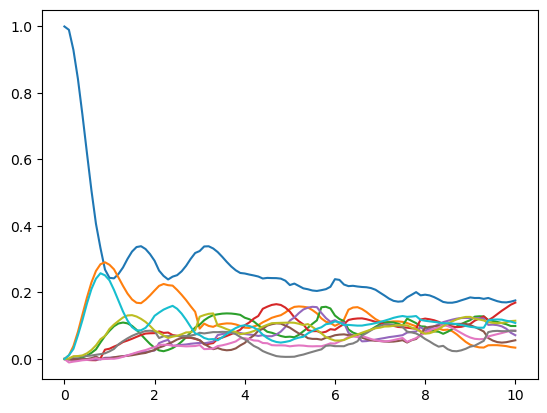

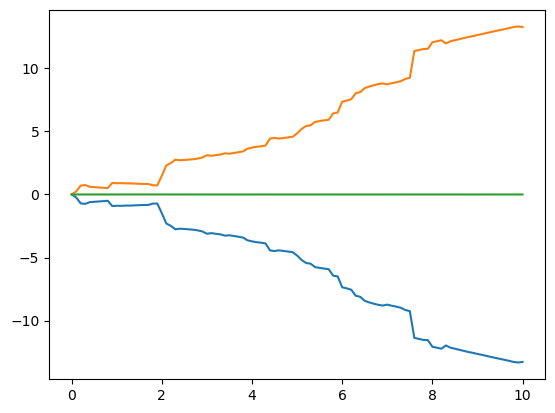

In [3]:
input_params = dict(num_states = 10, temp = 1, j = 1, w = 0.2, g = 1, m = 1)
sim = HolsteinLatticeModel(input_params=input_params)

sim.dynamics_method='FSSH'
sim.num_branches = sim.num_states
sim.tmax=10
sim.dt=0.1
sim.dt_bath=0.01
sim.sh_deterministic=True
sim.pab_cohere = True
sim.dmat_const = 0
sim.calc_fssh_obs = True
sim.gauge_fix = 0

sim.psi_db_0 = np.zeros((sim.num_states),dtype=complex)
sim.psi_db_0[0] = 1

sim.state_vars_list = ['rho_db_fssh','z_branch','evals_branch', 'act_surf_ind_branch']
def observables(sim, state_vars):
    output_dictionary = {}
    z_branch = state_vars['z_branch']
    output_dictionary['E_c'] = np.sum(sim.h_c(z_branch))
    evals_branch = state_vars['evals_branch']
    act_surf_ind_branch = state_vars['act_surf_ind_branch']
    eq = 0
    for n in range(len(act_surf_ind_branch)):
        eq += evals_branch[n][act_surf_ind_branch[n]]
    output_dictionary['E_q'] = eq
    output_dictionary['pops_db_fssh'] = np.real(np.diag(state_vars['rho_db_fssh']))
    return output_dictionary
sim.fssh_observables=observables

num_traj = 10
data = simulation.Data()
for seed in tqdm(range(num_traj)):
    traj = dynamics.dynamics(sim, simulation.Trajectory(seed))
    data.add_data(traj)

pops = data.data_dic['pops_db_fssh']
ntraj = np.sum(pops[0])
eq = data.data_dic['E_q']/ntraj
ec = data.data_dic['E_c']/ntraj
pops = pops/ntraj
print(ntraj)
t = data.data_dic['t']/ntraj
plt.plot(t,pops)
plt.show()
plt.plot(t,eq-eq[0])
plt.plot(t,ec-ec[0])
plt.plot(t,(eq-eq[0])+(ec-ec[0]))
plt.show()

100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

9.999999999999996


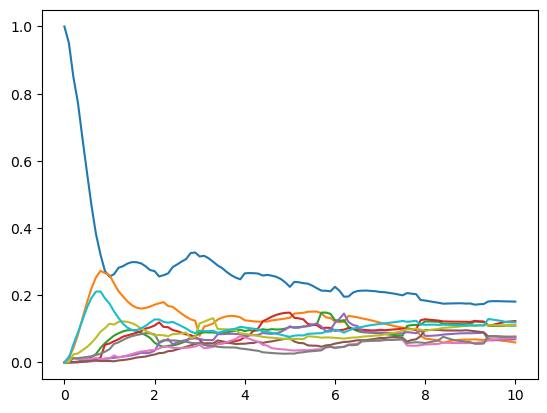

In [4]:
input_params = dict(num_states = 10, temp = 1, j = 1, w = 0.2, g = 1, m = 1)
sim = HolsteinLatticeModel(input_params=input_params)

sim.dynamics_method='CFSSH'
sim.num_branches = sim.num_states
sim.tmax=10
sim.dt=0.1
sim.dt_bath=0.01
sim.sh_deterministic=True
sim.pab_cohere = True
sim.dmat_const = 0
sim.calc_cfssh_obs = True
sim.gauge_fix = 0

sim.psi_db_0 = np.zeros((sim.num_states),dtype=complex)
sim.psi_db_0[0] = 1

sim.state_vars_list = ['rho_db_cfssh','z_branch','evals_branch', 'act_surf_ind_branch']
def observables(sim, state_vars):
    output_dictionary = {}
    z_branch = state_vars['z_branch']
    output_dictionary['E_c'] = np.sum(sim.h_c(z_branch))
    evals_branch = state_vars['evals_branch']
    act_surf_ind_branch = state_vars['act_surf_ind_branch']
    eq = 0
    for n in range(len(act_surf_ind_branch)):
        eq += evals_branch[n][act_surf_ind_branch[n]]
    output_dictionary['E_q'] = eq
    output_dictionary['pops_db_cfssh'] = np.real(np.diag(state_vars['rho_db_cfssh']))
    return output_dictionary
sim.cfssh_observables=observables

num_traj = 10
data = simulation.Data()
for seed in tqdm(range(num_traj)):
    traj = dynamics.dynamics(sim, simulation.Trajectory(seed))
    data.add_data(traj)

pops = data.data_dic['pops_db_cfssh']
ntraj = np.sum(pops[0])
eq = data.data_dic['E_q']/ntraj
ec = data.data_dic['E_c']/ntraj
pops = pops/ntraj
print(ntraj)
t = data.data_dic['t']/ntraj
plt.plot(t,pops)
plt.show()
#plt.plot(t,eq-eq[0])
#plt.plot(t,ec-ec[0])
#plt.plot(t,(eq-eq[0])+(ec-ec[0]))
#plt.show()

100%|██████████| 10/10 [00:42<00:00,  4.26s/it]

0.9999999999999999


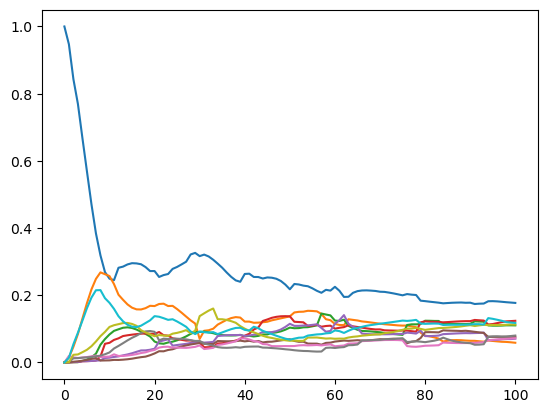

In [2]:
input_params = dict(num_states = 10, temp = 1, j = 1, w = 0.2, g = 1, m = 1)
sim = HolsteinLatticeModel(input_params=input_params)

sim.dynamics_method='CFSSH'
sim.num_branches = sim.num_states
sim.tmax=10
sim.dt=0.1
sim.dt_bath=0.01
sim.sh_deterministic=True
sim.pab_cohere = True
sim.dmat_const = 1
sim.calc_cfssh_obs = True
sim.cfssh_branch_pair_update = 2
sim.gauge_fix = 0

sim.psi_db_0 = np.zeros((sim.num_states),dtype=complex)
sim.psi_db_0[0] = 1

sim.state_vars_list = ['rho_db_cfssh','z_branch','evals_branch', 'act_surf_ind_branch']
def observables(sim, state_vars):
    output_dictionary = {}
    z_branch = state_vars['z_branch']
    output_dictionary['E_c'] = np.sum(sim.h_c(z_branch))
    evals_branch = state_vars['evals_branch']
    act_surf_ind_branch = state_vars['act_surf_ind_branch']
    eq = 0
    for n in range(len(act_surf_ind_branch)):
        eq += evals_branch[n][act_surf_ind_branch[n]]
    output_dictionary['E_q'] = eq
    output_dictionary['pops_db_cfssh'] = np.real(np.diag(state_vars['rho_db_cfssh']))
    return output_dictionary
sim.cfssh_observables=observables

num_traj = 10
data = simulation.Data()
for seed in tqdm(range(num_traj)):
    traj = dynamics.dynamics(sim, simulation.Trajectory(seed))
    data.add_data(traj)

pops = data.data_dic['pops_db_cfssh']
ntraj = np.sum(pops[0])
eq = data.data_dic['E_q']/ntraj
ec = data.data_dic['E_c']/ntraj
pops = pops/ntraj
print(ntraj)
t = data.data_dic['t']/ntraj
plt.plot(t,pops)
plt.show()
#plt.plot(t,eq-eq[0])
#plt.plot(t,ec-ec[0])
#plt.plot(t,(eq-eq[0])+(ec-ec[0]))
#plt.show()